In [1]:
library(readxl)
library(ggplot2)
library(writexl)
library(dplyr)
#install.packages("gridExtra")
library(gridExtra)
library(ggrepel)

Warning message:
"package 'ggplot2' was built under R version 4.0.3"
Warning message:
"package 'writexl' was built under R version 4.0.3"
Warning message:
"package 'dplyr' was built under R version 4.0.3"

Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Warning message:
"package 'gridExtra' was built under R version 4.0.5"

Attaching package: 'gridExtra'


The following object is masked from 'package:dplyr':

    combine


Warning message:
"package 'ggrepel' was built under R version 4.0.3"


In [9]:
df.class = read_excel("../../results/class.xlsx" ,sheet=1 )
df.scale = read_excel("../../results/class-scale.xlsx" ,sheet=1 )
df.wa = read_excel( "../../results/df-water-access.xlsx" ,sheet=1)
df.fa <- read_excel("../../results/df-seven-scores.xlsx",sheet=1)
df.fa <- df.fa %>% 
  rename(
      'Far.away.Dugwell' = ML1,
      'Package.Water'= ML2,
      'Piped.to.homes'= ML3,
      'Near.by.borehole'= ML4,
      'Piped.to.Yard.and.Tap' = ML5,
      'Spring' = ML6,
      'Near.by.Surface'= ML7
     )
df <- merge(x = df.class,
              y = df.fa,
              by = c("Country"))
df$clusters <- as.factor(df$clusters)

df <- df[,c(1,8,5,9, 12, 16:22 )] # 3 important explnatory variables from classification decision tree
head(df)


,Country,clusters,pcar,cgdp,popd,Far.away.Dugwell,Spring,Piped.to.homes,Piped.to.Yard.and.Tap,Package.Water,Near.by.Surface,Near.by.borehole
,<chr>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Afghanistan,Off-premise,11.8,18353881130,56.93776,0.572418217,0.27948505,0.4740642,0.48905269,0.3327190,0.6406390,0.5244550
2,Albania,Market,37.0,15147020535,104.61226,0.173347287,0.16631234,0.7812555,0.21604457,0.3179487,0.2668756,0.5813036
3,Angola,Off-premise,10.9,101353230785,24.71305,0.555402896,0.26567935,0.6221088,0.51799504,0.4010244,0.8739405,0.4280040
4,Armenia,Piping,39.2,12457941907,103.68022,0.006249719,0.01802207,0.9992766,0.05567089,0.0000000,0.1978413,0.5088645
5,Azerbaijan,Piping,20.4,47112941176,120.23432,0.172305543,0.17209406,0.6946237,0.41693952,0.2060016,0.4634648,0.4247652
6,Bangladesh,Market,0.8,274039092455,1239.57931,0.116506831,0.08746231,0.0000000,0.29168400,0.1829046,0.1907371,0.5876124


# Scatter Analysis PCAR

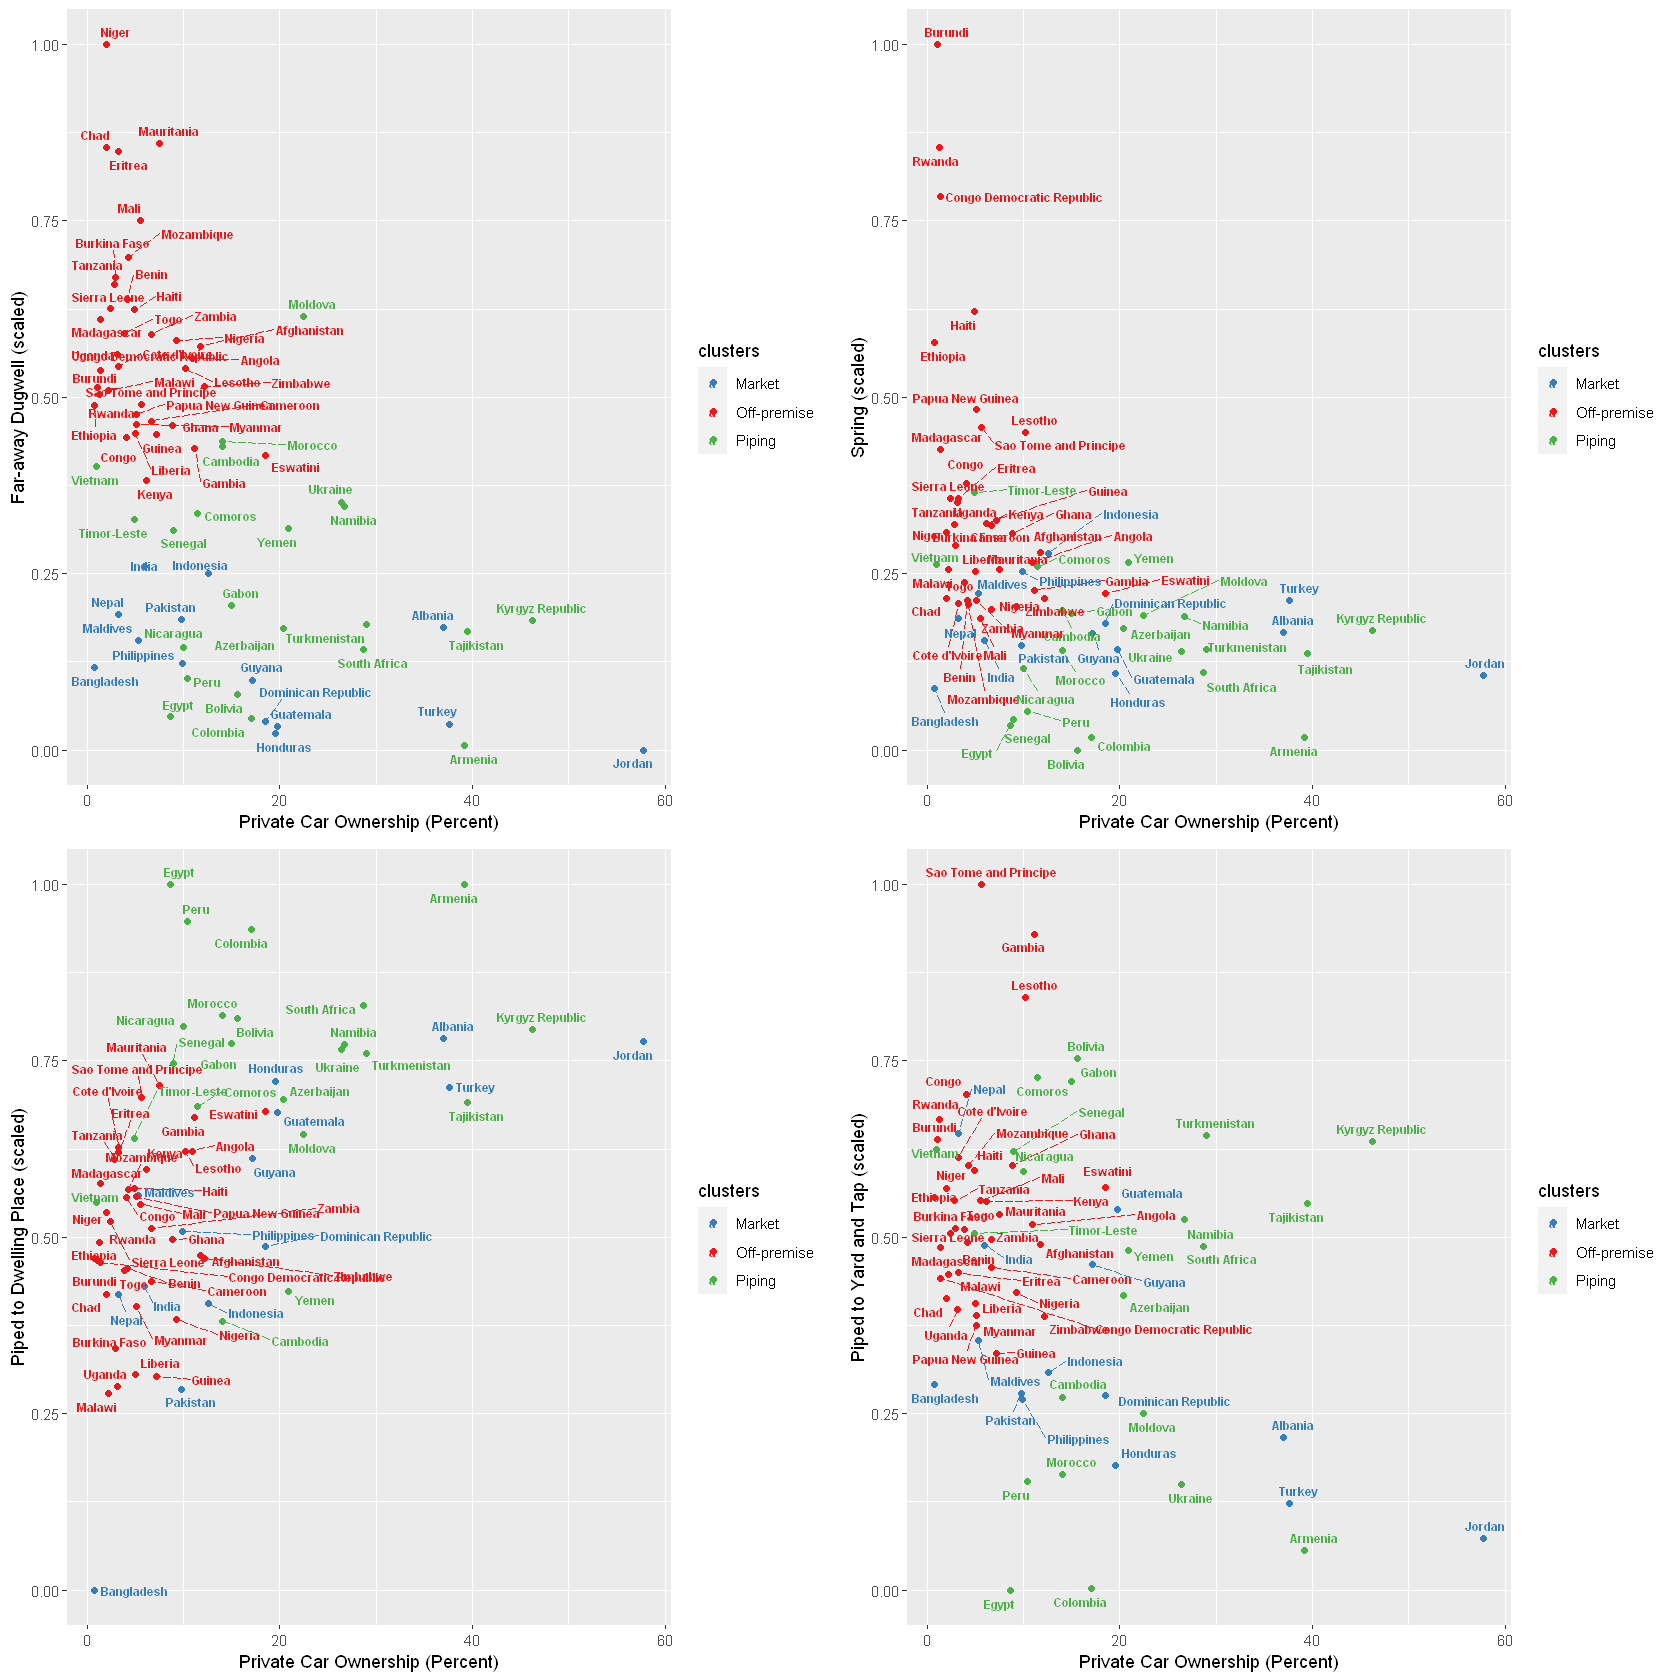

In [42]:

spd <- ggplot(df, aes(x=pcar, y= Far.away.Dugwell, color=clusters)) +
  geom_point() + 
  scale_color_manual(values=c('#377EB8','#E41A1C','#4DAF4A'))+ 
  labs(title=,
       x="Private Car Ownership (Percent)", y = "Far-away Dugwell (scaled)") +
  geom_text_repel(
   aes(label= Country), size = 2.5,
     force= 1,
      force_pull = 1,
      angle = 0,
      fontface = 2,
      segment.linetype = 5,
    max.overlaps = Inf)

sps <- ggplot(df, aes(x=pcar, y= Spring, color=clusters)) +
  geom_point() + 
  scale_color_manual(values=c('#377EB8','#E41A1C','#4DAF4A'))+ 
  labs(title=,
       x="Private Car Ownership (Percent)", y = "Spring (scaled)")  +
  geom_text_repel(
   aes(label= Country), size = 2.5,
     force= 1,
      force_pull = 1,
      angle = 0,
      fontface = 2,
      segment.linetype = 5,
    max.overlaps = Inf)
spp <- ggplot(df, aes(x=pcar, y= Piped.to.homes, color=clusters)) +
  geom_point() + 
  scale_color_manual(values=c('#377EB8','#E41A1C','#4DAF4A'))+ 
  labs(title=,
       x="Private Car Ownership (Percent)", y = "Piped to Dwelling Place (scaled)")  +
  geom_text_repel(
   aes(label= Country), size = 2.5,
     force= 1,
      force_pull = 1,
      angle = 0,
      fontface = 2,
      segment.linetype = 5,
    max.overlaps = Inf)
spy <- ggplot(df, aes(x=pcar, y= Piped.to.Yard.and.Tap, color=clusters)) +
  geom_point() + 
  scale_color_manual(values=c('#377EB8','#E41A1C','#4DAF4A'))+ 
  labs(title=,
       x="Private Car Ownership (Percent)", y = "Piped to Yard and Tap (scaled)")  +
  geom_text_repel(
   aes(label= Country), size = 2.5,
     force= 1,
      force_pull = 1,
      angle = 0,
      fontface = 2,
      segment.linetype = 5,
    max.overlaps = Inf)
sppw <- ggplot(df, aes(x=pcar, y= Package.Water, color=clusters)) +
  geom_point() + 
  scale_color_manual(values=c('#377EB8','#E41A1C','#4DAF4A'))+ 
  labs(
       x="Private Car Ownership (Aggregation)", y = "Package Water (scaled)") +
  geom_text_repel(
   aes(label= Country), size = 2.5,
     force= 1,
      force_pull = 1,
      angle = 0,
      fontface = 2,
      segment.linetype = 5,
    max.overlaps = Inf)
spns <- ggplot(df, aes(x=pcar, y= Near.by.Surface, color=clusters)) +
  geom_point() + 
  scale_color_manual(values=c('#377EB8','#E41A1C','#4DAF4A'))+ 
  labs(title=,
       x="Private Car Ownership (Percent)", y = "Near-by Surface Water (scaled)") +
  geom_text_repel(
   aes(label= Country), size = 2.5,
     force= 1,
      force_pull = 1,
      angle = 0,
      fontface = 2,
      segment.linetype = 5,
    max.overlaps = Inf)
spb <- ggplot(df, aes(x=pcar, y= Near.by.borehole, color=clusters)) +
  geom_point() + 
  scale_color_manual(values=c('#377EB8','#E41A1C','#4DAF4A'))+ 
  labs(title=,
       x="Private Car Ownership (Percent)", y = "Near-by Borehole (scaled)") +
  geom_text_repel(
   aes(label= Country), size = 2.5,
     force= 1,
      force_pull = 1,
      angle = 0,
      fontface = 2,
      segment.linetype = 5,
    max.overlaps = Inf)
options(repr.plot.width=14, repr.plot.height=14)
 

In [44]:
 
options(repr.plot.width=14, repr.plot.height=14)
par(mar = c(1,1,1,1))
par(cex=1.4)

png(
  "scatter-pcar-1.png",
  width     = 14,
  height    = 14,
  units     = "in",
  res       = 700,
  #pointsize = 6
)
grid.arrange(spd,sps,spp,spy , ncol=2, nrow=2, widths=c(5, 5), heights=c(5, 5))  
dev.off()



png(
  "scatter-pcar-2.png",
  width     = 14,
  height    = 14,
  units     = "in",
  res       = 700,
  #pointsize = 6
)
grid.arrange(sppw,spns,spb,  ncol=2, nrow=2, widths=c(5, 5), heights=c(5, 5))  
dev.off()

png 
  2

png 
  2

# Scatter Analysis CGDP

In [45]:
spd <- ggplot(df, aes(x=log(cgdp), y= Far.away.Dugwell, color=clusters)) +
  geom_point() + 
  scale_color_manual(values=c('#377EB8','#E41A1C','#4DAF4A'))+ 
  labs(title=,
       x="GDP (current US $) ", y = "Far-away Dugwell (scaled)")+
  geom_text_repel(
   aes(label= Country), size = 2.5,
     force= 1,
      force_pull = 1,
      angle = 0,
      fontface = 2,
      segment.linetype = 5,
    max.overlaps = Inf)
sps <- ggplot(df, aes(x=log(cgdp), y= Spring, color=clusters)) +
  geom_point() + 
  scale_color_manual(values=c('#377EB8','#E41A1C','#4DAF4A'))+ 
  labs(title=,
       x="GDP (current US $) ", y = "Spring (scaled)")  +
  geom_text_repel(
   aes(label= Country), size = 2.5,
     force= 1,
      force_pull = 1,
      angle = 0,
      fontface = 2,
      segment.linetype = 5,
    max.overlaps = Inf)

spp <- ggplot(df, aes(x=log(cgdp), y= Piped.to.homes, color=clusters)) +
  geom_point() + 
  scale_color_manual(values=c('#377EB8','#E41A1C','#4DAF4A'))+ 
  labs(title=,
       x="GDP (current US $)", y = "Piped to Dwelling Place (scaled)") +
  geom_text_repel(
   aes(label= Country), size = 2.5,
     force= 1,
      force_pull = 1,
      angle = 0,
      fontface = 2,
      segment.linetype = 5,
    max.overlaps = Inf)

spy <- ggplot(df, aes(x=log(cgdp), y= Piped.to.Yard.and.Tap, color=clusters)) +
  geom_point() + 
  scale_color_manual(values=c('#377EB8','#E41A1C','#4DAF4A'))+ 
  labs(title=,
       x="GDP (current US $)", y = "Piped to Yard and Tap (scaled)")  +
  geom_text_repel(
   aes(label= Country), size = 2.5,
     force= 1,
      force_pull = 1,
      angle = 0,
      fontface = 2,
      segment.linetype = 5,
    max.overlaps = Inf)

sppw <- ggplot(df, aes(x=log(cgdp), y= Package.Water, color=clusters)) +
  geom_point() + 
  scale_color_manual(values=c('#377EB8','#E41A1C','#4DAF4A'))+ 
  labs(title=,
       x="GDP (current US $)", y = "Package Water (scaled)") +
  geom_text_repel(
   aes(label= Country), size = 2.5,
     force= 1,
      force_pull = 1,
      angle = 0,
      fontface = 2,
      segment.linetype = 5,
    max.overlaps = Inf)

spns <- ggplot(df, aes(x=log(cgdp), y= Near.by.Surface, color=clusters)) +
  geom_point() + 
  scale_color_manual(values=c('#377EB8','#E41A1C','#4DAF4A'))+ 
  labs(title=,
       x="GDP (current US $)", y = "Near-by Surface Water (scaled)") +
  geom_text_repel(
   aes(label= Country), size = 2.5,
     force= 1,
      force_pull = 1,
      angle = 0,
      fontface = 2,
      segment.linetype = 5,
    max.overlaps = Inf)

spb <- ggplot(df, aes(x=log(cgdp), y= Near.by.borehole, color=clusters)) +
  geom_point() + 
  scale_color_manual(values=c('#377EB8','#E41A1C','#4DAF4A'))+ 
  labs(title=,
       x="GDP (current US $)", y = "Near-by Borehole (scaled)") +
  geom_text_repel(
   aes(label= Country), size = 2.5,
     force= 1,
      force_pull = 1,
      angle = 0,
      fontface = 2,
      segment.linetype = 5,
    max.overlaps = Inf)

options(repr.plot.width=14, repr.plot.height=14)
par(mar = c(1,1,1,1))
par(cex=1.4)

png(
  "scatter-cgdp-1.png",
  width     = 10,
  height    = 10,
  units     = "in",
  res       = 700,
  #pointsize = 6
)
grid.arrange(spd,sps,spp,spy , ncol=2, nrow=2, widths=c(5, 5), heights=c(5, 5))  
dev.off()

png(
  "scatter-cgdp-2.png",
  width     = 10,
  height    = 10,
  units     = "in",
  res       = 700,
  #pointsize = 6
)
grid.arrange(sppw,spns,spb,  ncol=2, nrow=2, widths=c(5, 5), heights=c(5, 5))  
dev.off()

png 
  2

png 
  2

# Scatter popd

In [46]:
spd <- ggplot(df, aes(x=popd, y= Far.away.Dugwell, color=clusters)) +
  geom_point() + 
  scale_color_manual(values=c('#377EB8','#E41A1C','#4DAF4A'))+ 
  labs(title=,
       x="Population Density (people per sq. km of land area)", y = "Far-away Dugwell (scaled)")+
  geom_text_repel(
   aes(label= Country), size = 2.5,
     force= 1,
      force_pull = 1,
      angle = 0,
      fontface = 2,
      segment.linetype = 5,
    max.overlaps = Inf)


sps <- ggplot(df, aes(x=popd, y= Spring, color=clusters)) +
  geom_point() + 
  scale_color_manual(values=c('#377EB8','#E41A1C','#4DAF4A'))+ 
  labs(title=,
       x="Population Density (people per sq. km of land area)", y = "Spring (scaled)")  +
  geom_text_repel(
   aes(label= Country), size = 2.5,
     force= 1,
      force_pull = 1,
      angle = 0,
      fontface = 2,
      segment.linetype = 5,
    max.overlaps = Inf)

spp <- ggplot(df, aes(x=cgdp, y= Piped.to.homes, color=clusters)) +
  geom_point() + 
  scale_color_manual(values=c('#377EB8','#E41A1C','#4DAF4A'))+ 
  labs(title=,
       x="Population Density (people per sq. km of land area)", y = "Piped to Dwelling Place (scaled)")  +
  geom_text_repel(
   aes(label= Country), size = 2.5,
     force= 1,
      force_pull = 1,
      angle = 0,
      fontface = 2,
      segment.linetype = 5,
    max.overlaps = Inf)

spy <- ggplot(df, aes(x=popd, y= Piped.to.Yard.and.Tap, color=clusters)) +
  geom_point() + 
  scale_color_manual(values=c('#377EB8','#E41A1C','#4DAF4A'))+ 
  labs(title=,
       x="Population Density (people per sq. km of land area)", y = "Piped to Yard and Tap (scaled)")  +
  geom_text_repel(
   aes(label= Country), size = 2.5,
     force= 1,
      force_pull = 1,
      angle = 0,
      fontface = 2,
      segment.linetype = 5,
    max.overlaps = Inf)

sppw <- ggplot(df, aes(x=popd, y= Package.Water, color=clusters)) +
  geom_point() + 
  scale_color_manual(values=c('#377EB8','#E41A1C','#4DAF4A'))+ 
  labs(title=,
       x="Population Density (people per sq. km of land area)", y = "Package Water (scaled)") +
  geom_text_repel(
   aes(label= Country), size = 2.5,
     force= 1,
      force_pull = 1,
      angle = 0,
      fontface = 2,
      segment.linetype = 5,
    max.overlaps = Inf)

spns <- ggplot(df, aes(x=popd, y= Near.by.Surface, color=clusters)) +
  geom_point() + 
  scale_color_manual(values=c('#377EB8','#E41A1C','#4DAF4A'))+ 
  labs(title=,
       x="Population Density (people per sq. km of land area)", y = "Near-by Surface Water (scaled)") +
  geom_text_repel(
   aes(label= Country), size = 2.5,
     force= 1,
      force_pull = 1,
      angle = 0,
      fontface = 2,
      segment.linetype = 5,
    max.overlaps = Inf)

spb <- ggplot(df, aes(x=popd, y= Near.by.borehole, color=clusters)) +
  geom_point() + 
  scale_color_manual(values=c('#377EB8','#E41A1C','#4DAF4A'))+ 
  labs(title=,
       x="Population Density (people per sq. km of land area)", y = "Near-by Borehole (scaled)") +
  geom_text_repel(
   aes(label= Country), size = 2.5,
     force= 1,
      force_pull = 1,
      angle = 0,
      fontface = 2,
      segment.linetype = 5,
    max.overlaps = Inf)


options(repr.plot.width=14, repr.plot.height=14)
par(mar = c(1,1,1,1))
par(cex=1.4)

png(
  "scatter-popd-1.png",
  width     = 10,
  height    = 10,
  units     = "in",
  res       = 700,
  #pointsize = 6
)
grid.arrange(spd,sps,spp,spy , ncol=2, nrow=2, widths=c(5, 5), heights=c(5, 5))  
dev.off()

png(
  "scatter-popd-2.png",
  width     = 10,
  height    = 10,
  units     = "in",
  res       = 700,
  #pointsize = 6
)
grid.arrange(sppw,spns,spb,  ncol=2, nrow=2, widths=c(5, 5), heights=c(5, 5))  
dev.off()

png 
  2

png 
  2

# unimproved or improved comparison

In [47]:
df.pro = read_excel("../../results/dfsimple.xlsx" ,sheet=1 )
df.pro <- df.pro[,c(1,4,15)]
df <- merge(x = df.class,
              y = df.pro,
              by = c("Country"))
df$clusters <- as.factor(df$clusters)
df <- df[,c(1,8,5,6,9,13,12,16:17)]

sp.pcar.imws <- ggplot(df, aes(x=pcar, y= imws, color=clusters)) +
  geom_point() + 
  scale_color_manual(values=c('#377EB8','#E41A1C','#4DAF4A'))+ 
  labs(title=,
       x="Private Car Ownership (Percent)", y = "Households using an improved water source (Percent)")+
  geom_text_repel(
   aes(label= Country), size = 2.5,
     force= 1,
      force_pull = 1,
      angle = 0,
      fontface = 2,
      segment.linetype = 5,
    max.overlaps = Inf)

sp.cgdp.imws <- ggplot(df, aes(x=log(cgdp), y= imws, color=clusters)) +
  geom_point() + 
  scale_color_manual(values=c('#377EB8','#E41A1C','#4DAF4A'))+ 
  labs(title=,
       x="GDP (current US $)", y = "Households using an improved water source (Percent)")+
  geom_text_repel(
   aes(label= Country), size = 2.5,
     force= 1,
      force_pull = 1,
      angle = 0,
      fontface = 2,
      segment.linetype = 5,
    max.overlaps = Inf)

sp.popd.imws <- ggplot(df, aes(x=popd, y= imws, color=clusters)) +
  geom_point() + 
  scale_color_manual(values=c('#377EB8','#E41A1C','#4DAF4A'))+ 
  labs(title=,
       x="Population Density (people per sq. km of land area)", y = "Households using an improved water source (Percent)")+
  geom_text_repel(
   aes(label= Country), size = 2.5,
     force= 1,
      force_pull = 1,
      angle = 0,
      fontface = 2,
      segment.linetype = 5,
    max.overlaps = Inf)

sp.boat.imws <- ggplot(df, aes(x=boat, y= imws, color=clusters)) +
  geom_point() + 
  scale_color_manual(values=c('#377EB8','#E41A1C','#4DAF4A'))+ 
  labs(title=,
       x="Private Boat Ownership (Percent)", y = "Households using an improved water source (Percent)")+
  geom_text_repel(
   aes(label= Country), size = 2.5,
     force= 1,
      force_pull = 1,
      angle = 0,
      fontface = 2,
      segment.linetype = 5,
    max.overlaps = Inf)


options(repr.plot.width=14, repr.plot.height=14)
par(mar = c(1,1,1,1))
par(cex=1.4)

png(
  "scatter-improve-importance.png",
  width     = 10,
  height    = 10,
  units     = "in",
  res       = 700,
  #pointsize = 6
)
grid.arrange(sp.pcar.imws, sp.cgdp.imws ,sp.popd.imws,sp.boat.imws ,ncol=2, nrow=2, widths=c(5,5), heights=c(5,5))  
dev.off()



,Country,clusters,pcar,boat,cgdp,land,popd,imws,uiws
,<chr>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Afghanistan,Off-premise,11.8,0.0,18353881130,652860,56.93776,71.2,28.7
2,Albania,Market,37.0,0.7,15147020535,27400,104.61226,98.4,1.6
3,Angola,Off-premise,10.9,0.4,101353230785,1246700,24.71305,66.9,33.1
4,Armenia,Piping,39.2,0.3,12457941907,28470,103.68022,99.9,0.1
5,Azerbaijan,Piping,20.4,0.1,47112941176,82670,120.23432,90.6,9.4
6,Bangladesh,Market,0.8,0.0,274039092455,130170,1239.57931,97.8,2.2


png 
  2

# Transportation

In [54]:
df.veh = read_excel("../../results/dfsimple.xlsx" ,sheet=1 )
df.veh <- df.veh[,c(1,4)]
df <- merge(x = df.class,
              y = df.veh,
              by = c("Country"))
head(df)

,Country,bicy,cart,mcyc,pcar,boat,wigc,clusters,cgdp,tpop,upop,popd,land,rifr,prec,imws
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Afghanistan,30.0,5.8,35.2,11.8,0.0,0.1,Off-premise,18353881130,37172386,25.495,56.93776,652860,1299.0269,327,71.2
2,Albania,26.4,3.2,9.6,37.0,0.7,0.1,Market,15147020535,2866376,60.319,104.61226,27400,9361.5460,1485,98.4
3,Angola,4.6,1.3,17.8,10.9,0.4,0.3,Off-premise,101353230785,30809762,65.514,24.71305,1246700,4963.6533,1010,66.9
4,Armenia,8.6,0.4,0.2,39.2,0.3,0.1,Piping,12457941907,2951776,63.149,103.68022,28470,2329.1833,562,99.9
5,Azerbaijan,6.9,3.3,1.1,20.4,0.1,0.0,Piping,47112941176,9939771,55.680,120.23432,82670,823.5207,447,90.6
6,Bangladesh,25.1,0.0,6.4,0.8,0.0,0.3,Market,274039092455,161356039,36.632,1239.57931,130170,657.6039,2666,97.8


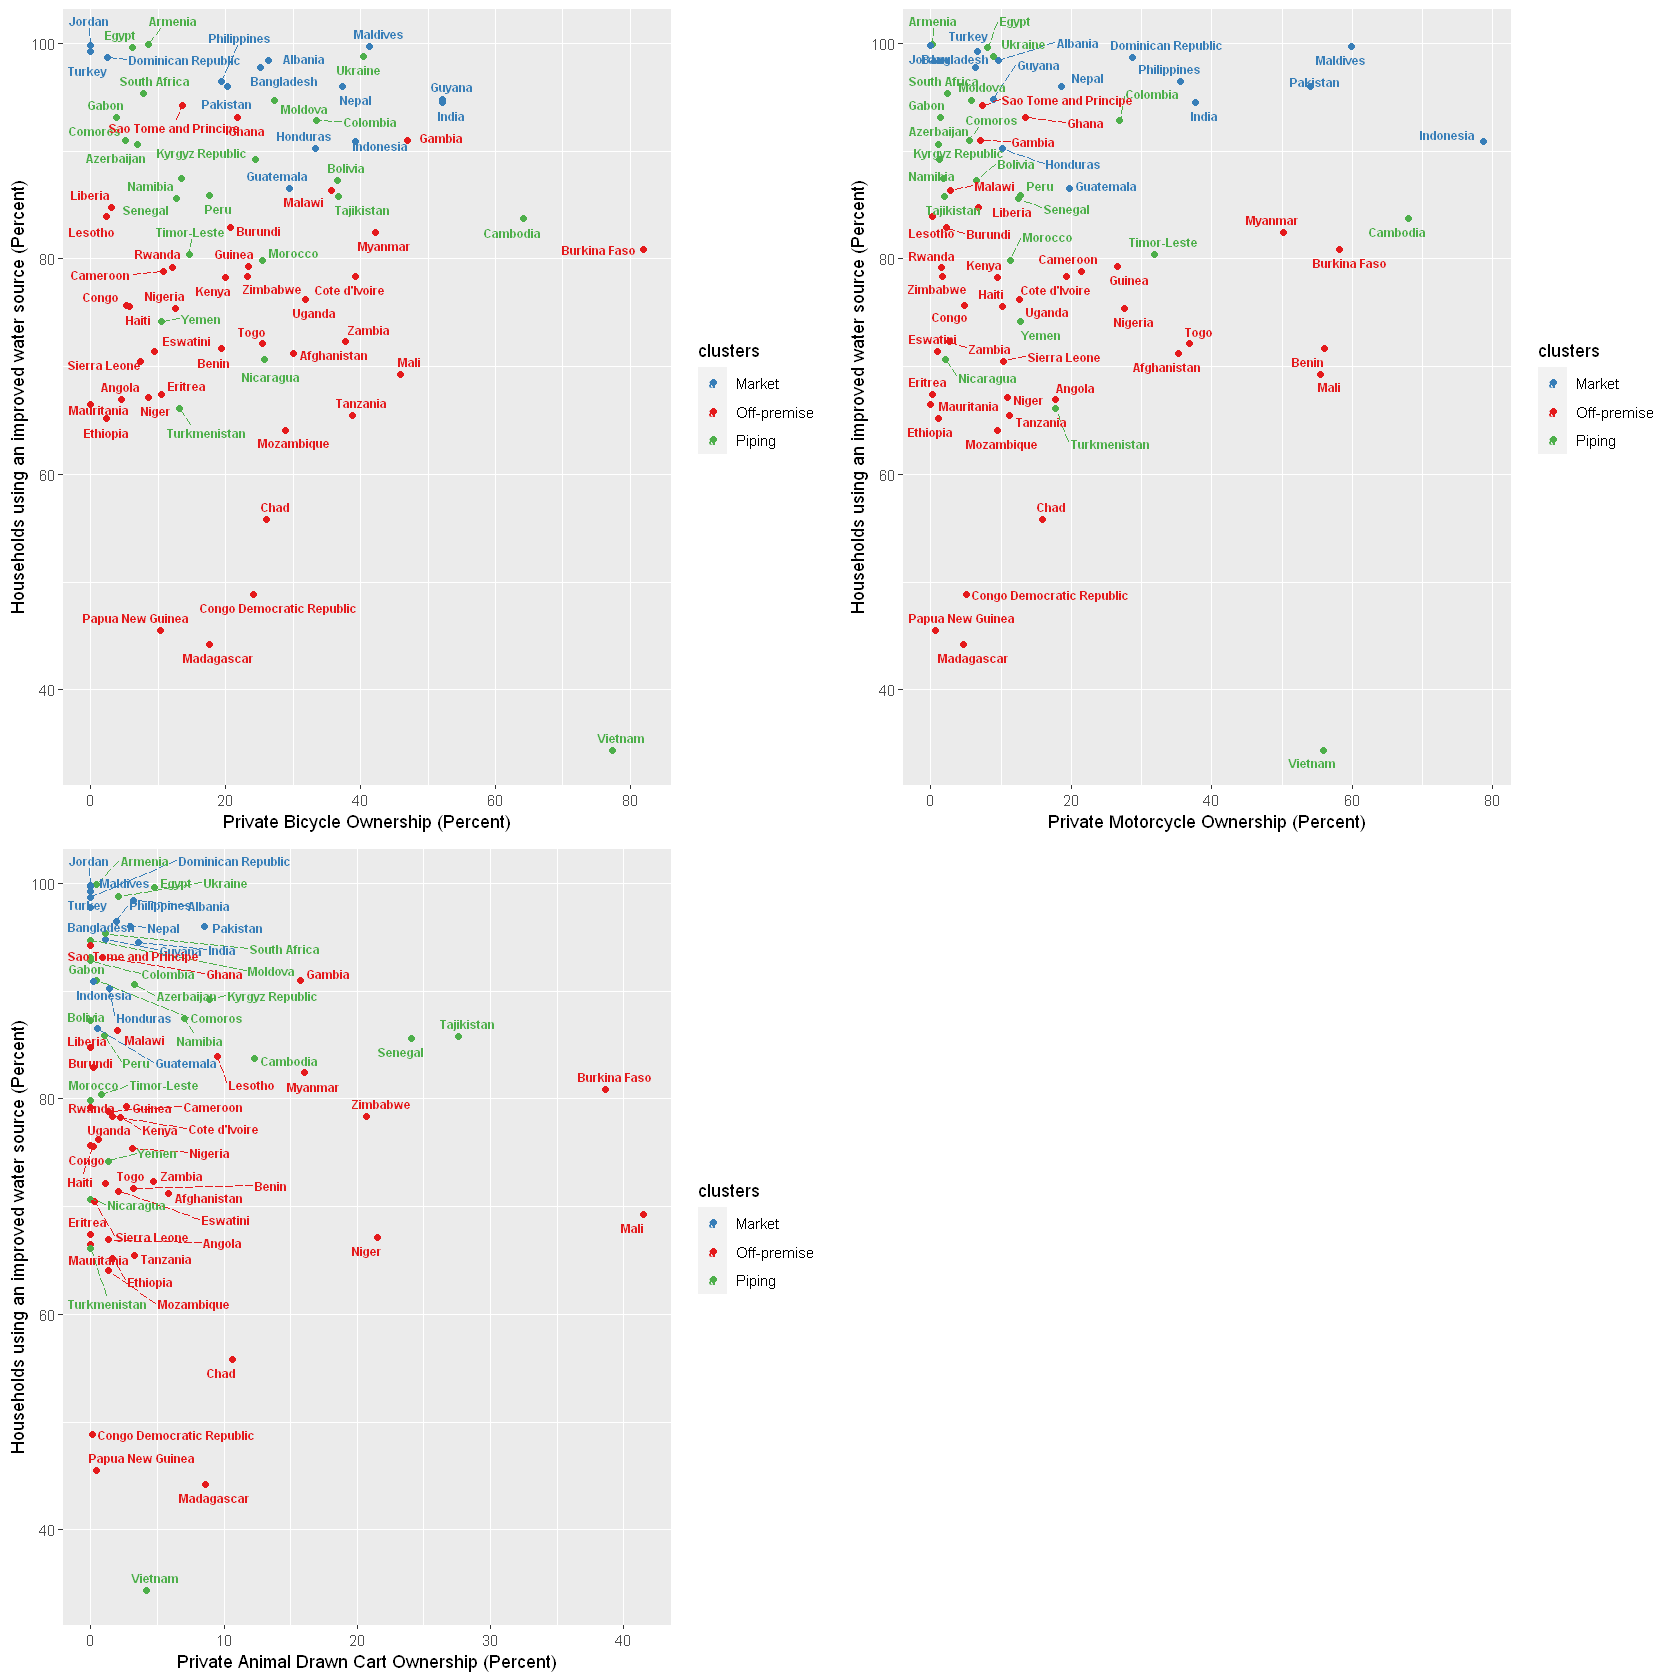

In [56]:
sp.bicy.imws <- ggplot(df, aes(x=bicy, y= imws, color=clusters)) +
  geom_point() + 
  scale_color_manual(values=c('#377EB8','#E41A1C','#4DAF4A'))+ 
  labs(title=,
       x="Private Bicycle Ownership (Percent)", y = "Households using an improved water source (Percent)")+
  geom_text_repel(
   aes(label= Country), size = 2.5,
     force= 1,
      force_pull = 1,
      angle = 0,
      fontface = 2,
      segment.linetype = 5,
    max.overlaps = Inf)

sp.mcyc.imws <- ggplot(df, aes(x=mcyc, y= imws, color=clusters)) +
  geom_point() + 
  scale_color_manual(values=c('#377EB8','#E41A1C','#4DAF4A'))+ 
  labs(title=,
       x="Private Motorcycle Ownership (Percent)", y = "Households using an improved water source (Percent)")+
  geom_text_repel(
   aes(label= Country), size = 2.5,
     force= 1,
      force_pull = 1,
      angle = 0,
      fontface = 2,
      segment.linetype = 5,
    max.overlaps = Inf)

sp.cart.imws <- ggplot(df, aes(x=cart, y= imws, color=clusters)) +
  geom_point() + 
  scale_color_manual(values=c('#377EB8','#E41A1C','#4DAF4A'))+ 
  labs(title=,
       x="Private Animal Drawn Cart Ownership (Percent)", y = "Households using an improved water source (Percent)")+
  geom_text_repel(
   aes(label= Country), size = 2.5,
     force= 1,
      force_pull = 1,
      angle = 0,
      fontface = 2,
      segment.linetype = 5,
    max.overlaps = Inf)

grid.arrange(sp.bicy.imws, sp.mcyc.imws ,sp.cart.imws ,ncol=2, nrow=2, widths=c(5,5), heights=c(5,5))